In [1]:
# Import Libraries
import numpy as np        
import seaborn as sns               
import matplotlib.pyplot as plt                          
import pandas as pd                      

In [2]:
# read the data
dp = pd.read_csv('../dev_space/penguins.csv')
dp.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [3]:
dp_clean = dp.dropna()
dp_clean.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [4]:
dp_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [5]:
# DBSCAN - CLUSTERING
# epsilon is the most important variable in DBSCAN
# euclidean distance
# you can apply dbscan on correlation matrix
from sklearn.cluster import DBSCAN

# numerical data
df_num = dp_clean.select_dtypes(include='float64')

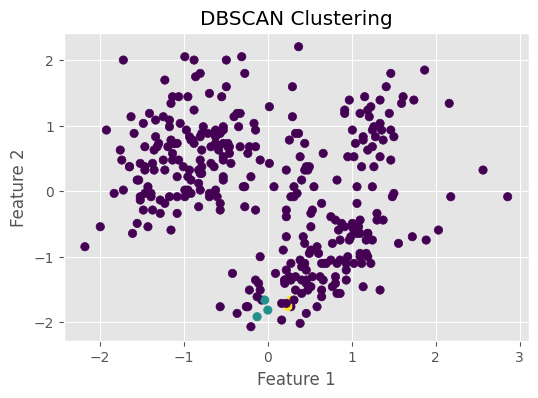

In [6]:
#DBSCAN implementation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df_num)


clustmodel = DBSCAN(eps=0.2, min_samples=3)
labels = clustmodel.fit_predict(X)

plt.figure(figsize=(6,4))
with plt.style.context('ggplot'):
    plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
    plt.title('DBSCAN Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_2536\1610424204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_clean['cluster'] = labels


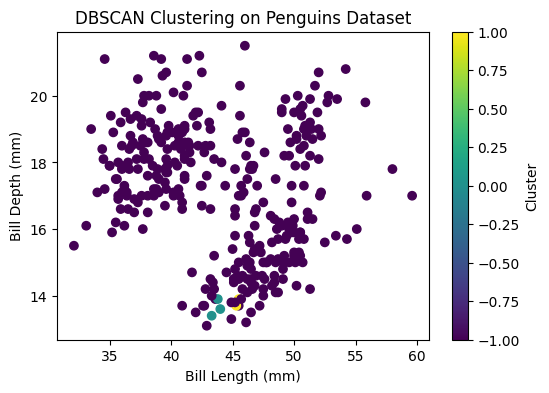

In [7]:
dp_clean['cluster'] = labels
dp_clean.columns

plt.figure(figsize=(6,4))
plt.scatter(dp_clean['bill_length_mm'], dp_clean['bill_depth_mm'], c=dp_clean['cluster'], cmap='viridis')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('DBSCAN Clustering on Penguins Dataset')
plt.colorbar(label='Cluster')
plt.show()



#### o---> XGBOOST Regression

In [8]:
# Import preprocessing and encoders
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# define x and y data for the analysis
X = dp_clean.loc[:,['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm']]

y = dp_clean['body_mass_g']

In [9]:
# import libraries
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# scale the data using Min Max Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# XGBOOST
# from sklearn.preprocessing import SimpleImputer

from xgboost import XGBRegressor, XGBClassifier

xgbressor_model = XGBRegressor()
xgbressor_model.fit(X_train, y_train, verbose=True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [11]:
# make predicitons
predictions = xgbressor_model.predict(X_test)

# metrics of results
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# metrics of analysis
mse_results = mean_squared_error(y_test, predictions)
mae_results = mean_absolute_error(y_test, predictions)
r2_value = r2_score(y_test, predictions)


# print metric results
print(f'mean absolut error: {mae_results:.3f}')
print(f'mean squared error: {mse_results:.3f}')
print(f'r-squared value: {r2_value:.3f}')

mean absolut error: 304.063
mean squared error: 142322.620
r-squared value: 0.774


#### o--> XGBOOST model with hyper-parameter tuning

In [12]:
dp_clean.shape

(333, 8)

In [13]:
# number of estimaters
# early stopping rounds
# change tne number of estimators

model_estimators = XGBRegressor(n_estimators=1000)
model_estimators.fit(
                    X = X_train, 
                    y = y_train, 
                     eval_set=[(X_test, y_test)], 
                     verbose=False
                     )

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [14]:
# make predicitons
predictions = model_estimators.predict(X_test)

# metrics of results
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# metrics of analysis
mse_results = mean_squared_error(y_test, predictions)
mae_results = mean_absolute_error(y_test, predictions)
r2_value = r2_score(y_test, predictions)


# print metric results
print(f'mean absolut error: {mae_results:.3f}')
print(f'mean squared error: {mse_results:.3f}')
print(f'r-squared value: {r2_value:.3f}')

mean absolut error: 305.226
mean squared error: 142808.119
r-squared value: 0.773


In [15]:
model_learn = XGBRegressor(n_estimators=1000, learning_rate=0.05)
model_learn.fit(
                    X = X_train, 
                    y = y_train,  
                     verbose=False
                     )

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [16]:
# make predicitons
predictions = model_learn.predict(X_test)

# metrics of results
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# metrics of analysis
mse_results = mean_squared_error(y_test, predictions)
mae_results = mean_absolute_error(y_test, predictions)
r2_value = r2_score(y_test, predictions)


# print metric results
print(f'mean absolut error: {mae_results:.3f}')
print(f'mean squared error: {mse_results:.3f}')
print(f'r-squared value: {r2_value:.3f}')

mean absolut error: 287.359
mean squared error: 126384.608
r-squared value: 0.799


#### o--> Hyperparameter Tuning

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100,1000],
    'max_depth': [3,7],
    'learning_rate':[0.01, 0.1],
    'subsample': [0.7,1.0],
    'colsample_bytree':[0.7, 1.0], 
    'gamma' : [0,0.1],
    'lambda':[1,2],
    'alpha': [0,1] 
    
}

In [19]:
grid_search = GridSearchCV(estimator=XGBRegressor(),
                           param_grid=param_grid, 
                           cv=3, 
                           scoring='neg_mean_squared_error',
                           verbose=1)


In [20]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 256 candidates, totalling 768 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'alpha': [0, 1], 'colsample_bytree': [0.7, 1.0],
                         'gamma': [0, 0.1], 'lambda': [1, 2],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 7],
                         'n_estimators': [100, 1000], 'subsample': [0.7, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# use best params to find the best parameters
grid_search.best_params_

{'alpha': 1,
 'colsample_bytree': 1.0,
 'gamma': 0,
 'lambda': 2,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 1000,
 'subsample': 1.0}

In [26]:
# use best estimator to predict X variables
y_predict = grid_search.best_estimator_.predict(X_test)

# make predicitons
# predictions = model_learn.predict(X_test)

# metrics of results
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# metrics of analysis
mse_results = mean_squared_error(y_test, y_predict)
mae_results = mean_absolute_error(y_test, y_predict)
r2_value = r2_score(y_test, y_predict)


# print metric results
print(f'mean absolut error: {mae_results:.3f}')
print(f'mean squared error: {mse_results:.3f}')
print(f'r-squared value: {r2_value:.3f}')

mean absolut error: 257.783
mean squared error: 101744.910
r-squared value: 0.838


#### o---> Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

# fit the model
linear_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# metrics of results
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# predictions based on linear regression
linear_predict = linear_model.predict(X_test)

# metrics of analysis
mse_results = mean_squared_error(y_test, linear_predict)
mae_results = mean_absolute_error(y_test, linear_predict)
r2_value = r2_score(y_test,linear_predict)


# print metric results
print(f'mean absolut error: {mae_results:.3f}')
print(f'mean squared error: {mse_results:.3f}')
print(f'r-squared value: {r2_value:.3f}')

mean absolut error: 289.689
mean squared error: 127200.472
r-squared value: 0.798


#### o---> Ridge Regression - L2 regularization

In [30]:
from sklearn.linear_model import Ridge   

ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.5)

In [31]:
# metrics of results
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# predictions based on linear model
ridge_predict = ridge_model.predict(X_test)

# metrics of analysis
mse_results = mean_squared_error(y_test, ridge_predict)
mae_results = mean_absolute_error(y_test, ridge_predict)
r2_value = r2_score(y_test,ridge_predict)


# print metric results
print(f'mean absolut error: {mae_results:.3f}')
print(f'mean squared error: {mse_results:.3f}')
print(f'r-squared value: {r2_value:.3f}')

mean absolut error: 294.394
mean squared error: 130499.672
r-squared value: 0.793


#### o---> Parameter Tuning with Ridge regression

In [43]:
from sklearn.model_selection import GridSearchCV

# setup the parameters for grid search
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0], # regularization parameter
    'max_iter': [100, 200, 300], # number of iterations
    'solver': ['auto', 'saga', 'cholesky', 'lsqr', 'saga', 'sag'] # solver to use
}

grid_search = GridSearchCV(
    estimator = Ridge(),
    param_grid = param_grid,
    scoring = 'neg_mean_squared_error',
    cv=3, # number of folds for cross-validation
    verbose=1 # verbosity level
)

# fit the grid search model
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0],
                         'max_iter': [100, 200, 300],
                         'solver': ['auto', 'saga', 'cholesky', 'lsqr', 'saga',
                                    'sag']},
             scoring='neg_mean_squared_error', verbose=1)

In [45]:
grid_search.best_params_

{'alpha': 0.1, 'max_iter': 100, 'solver': 'sag'}

In [46]:
# predict y using the best estimator from the grid search
ridge_tune = grid_search.best_estimator_.predict(X_test)

# metrics of results
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # predictions based on linear model
# ridge_predict = ridge_model.predict(X_test)

# metrics of analysis
mse_results = mean_squared_error(y_test, ridge_tune)
mae_results = mean_absolute_error(y_test, ridge_tune)
r2_value = r2_score(y_test,ridge_tune)


# print metric results
print(f'mean absolut error: {mae_results:.3f}')
print(f'mean squared error: {mse_results:.3f}')
print(f'r-squared value: {r2_value:.3f}')

mean absolut error: 290.607
mean squared error: 127652.821
r-squared value: 0.797
